# Daten Importieren

In [1]:
import pandas as pd

In [2]:
# Datensatz der VW-Aktienkurshistorie über Pandas laden
dataset = pd.read_csv("VOW3.DE_max.csv")

In [3]:
# Die neusten 90 Einträge des Datensatzes übernehmen
dataset = dataset.tail(90)

# Polynomial Regression Analysis

## Imports

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Datenaufbreitung (Daten konvertieren und in numpy-Arrays laden)

In [8]:
# Deklaration der zu befüllenden Arrays
stocks_X = []
stocks_Y = []

# Datenaufbereitung
for index, row in dataset.iterrows():
    # Konvertierung des Datums in passendes Format
    element = datetime.datetime.strptime(row['Date'],"%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(element)
    #Abspeichern des kovertierten Datums und dem Preis in neuen Arrays
    stocks_X.append([timestamp]) 
    stocks_Y.append([row['Close']])

# Abspeichern der Daten in einem numpy-Array
stocks_X = np.array(stocks_X)
stocks_Y = np.array(stocks_Y)

# Letzte 30 Einträge zum Testen in separates Array
stocks_X_test = stocks_X[-30:]
stocks_Y_test = stocks_Y[-30:]

# Restliche Einträge zum Trainieren in separates Array
stocks_X_train = stocks_X[:-30]
stocks_Y_train = stocks_Y[:-30]

## Regression

In [6]:
# Setzen der Polynomial-Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Vorbereiten der Polynomialen Regression
lin_reg = linear_model.LinearRegression()
pipeline = Pipeline([("polynomial_features", poly_features),
                     ("linear_regression", lin_reg)])
pipeline.fit(stocks_X_train, stocks_Y_train)

# Ausführen der Polynomialen Regression
stocks_Y_pred = pipeline.predict(stocks_X_test)
stocks_Y_pred_train = pipeline.predict(stocks_X_train)

## Plot

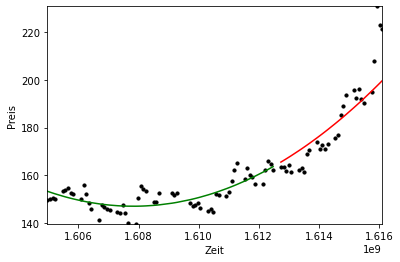

In [7]:
%matplotlib inline

# Plotten der Datenpunkte
plt.scatter(stocks_X, stocks_Y, 10, color='black', alpha=1)

# Plotten der Regressionsgerade der Trainingsdaten in grün
plt.plot(stocks_X_train, stocks_Y_pred_train, color='green', label="Model")

# Plotten der Vorhersage in rot
plt.plot(stocks_X_test, stocks_Y_pred, color='red', label="Model")
    
# Wertebereich anpassen
plt.xlim(min(stocks_X),max(stocks_X))
plt.ylim(min(stocks_Y),max(stocks_Y))

# Achsenbeschriftung
plt.ylabel("Preis")
plt.xlabel("Zeit")

# Ausgabe des Plots
plt.show()